<a href="https://colab.research.google.com/github/zm2143/AIProject/blob/main/baseline_image_search_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import os, os.path
import numpy as np
import ntpath
directory = "/content/drive/MyDrive/NYU /AI project/lfw"
imgs_path = []

for root, subdirectories, files in os.walk(directory):
    for file in files:
        imgs_path.append(os.path.join(root, file))

imgs_name = []
for i in imgs_path:
  imgs_name.append(ntpath.basename(i))

In [ ]:
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from PIL import Image as pil_image

model = VGG16(weights='imagenet',
                      include_top=False,pooling ="max")

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=model.input,
          outputs=model.output)

#create placeholder for images to go through neural net
images = np.zeros(shape=(1, 224, 224, 3))
vector =[]
count = 0
#Keras is more used to deal with PIL images 
for i in imgs_path:
    if count%100 == 0:
       print(count)
    count+=1
    img = pil_image.open(i)
    if img.mode != 'RGB':
        img = img.convert('RGB')
# Model requires the input shape to be (224,224,3)    
    img = img.resize((224, 224), pil_image.NEAREST)
    x_raw = image.img_to_array(img)
#overwrite first instance of images placeholder with the image array
    x_expand = np.expand_dims(x_raw, axis=0)
    images[0, :, :, :] = x_expand

# preprocess your image to be able to enter the neural network
    inputs = preprocess_input(images)
#predict image features
    images_features = model.predict(inputs)
    vector.append(images_features[0])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200


In [51]:
import csv

with open('/content/drive/MyDrive/NYU /AI project/image_name.csv') as f:
    imgs_name = [line.strip() for line in f]

with open('/content/drive/MyDrive/NYU /AI project/image_path.csv') as f:
    imgs_path = [line.strip() for line in f]
with open('/content/drive/MyDrive/NYU /AI project/data.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
vector = data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, imgs_name, test_size=0.20)

In [5]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
import numpy as np
#predict the value
y_pred = classifier.predict(X_test)


In [43]:
#find accuracy
for k in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_train, y_train)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=99.98%
k=2, accuracy=49.88%
k=3, accuracy=32.50%
k=4, accuracy=24.04%
k=5, accuracy=19.12%
k=6, accuracy=16.06%
k=7, accuracy=13.60%
k=8, accuracy=11.88%
k=9, accuracy=10.80%


In [44]:
#search 20 nearest neighbors and their indices in the list
from sklearn.neighbors import NearestNeighbors
nearest_20_faces = NearestNeighbors(n_neighbors=20, algorithm='auto').fit(vector)
distances, indices = nearest_20_faces.kneighbors(vector)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


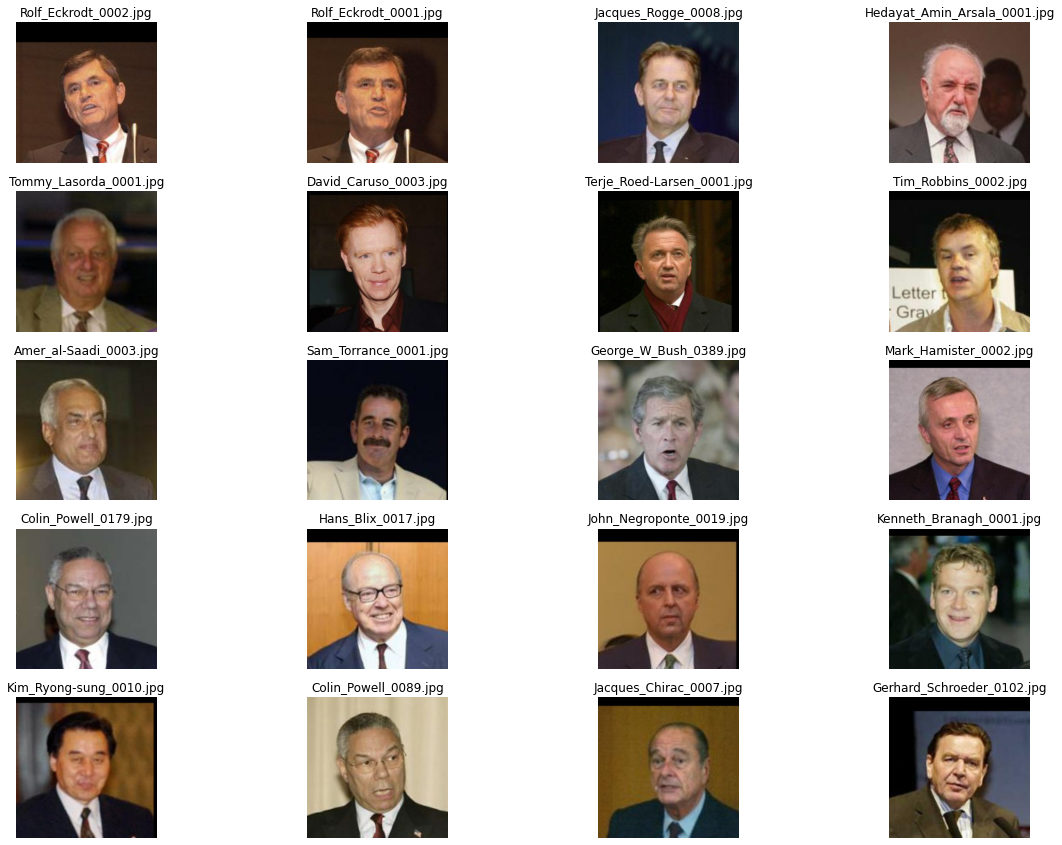

In [54]:
#load the plot
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import matplotlib.image as mpimg
import ntpath
search_image_index = 50
row = 5
column =4
fig = plt.figure(figsize=(20, 15))

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(mpimg.imread(imgs_path[indices[search_image_index][i]]))
    title = ntpath.basename(imgs_name[indices[search_image_index][i]])
    plt.title(title)
    plt.axis('off')

In [ ]:
from numpy import savetxt
savetxt('data.csv', vector, delimiter=',')
np.savetxt("image_name.csv", imgs_name, fmt="%s", delimiter=',')
np.savetxt("image_path.csv", imgs_path, fmt="%s", delimiter=',')

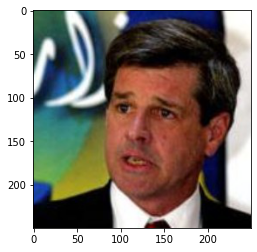

In [ ]:
#load the plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(imgs_path[indices[1][19]]))